In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
import pandas as pd
path_to_utilsGRF_="/Users/rosamartinezcorral/Dropbox (HMS)/backup_crg/repos/shared/utilsGRF" #GeneRegulatoryFunctions repo
sys.path.append(path_to_utilsGRF_)
import alphashape
import BoundaryFinder as BF
from matplotlib.gridspec import GridSpec
from shapely.geometry import Point, Polygon

In [2]:
foldernew="../boundaryanalysis_notebooks/ashapes"
name="ashape_N4Pb1000_7_2022_3_14.npy"   #pos_ar=np.arange(0.4,2.5+step,step) #stp_ar=np.arange(0.3,2.5+step,step) 
s0=np.load(os.path.join(foldernew,name))
name="ashape_N4Pb1000_ul_7_2023_8_21.npy"    #newposu=np.arange(0.1,0.5+step,step) #newstpu=np.arange(0.8,1.3+step,step) 

s1=np.load(os.path.join(foldernew,name))
ll_corner=[0.1,0.3] #coordinates of the lower-left corner

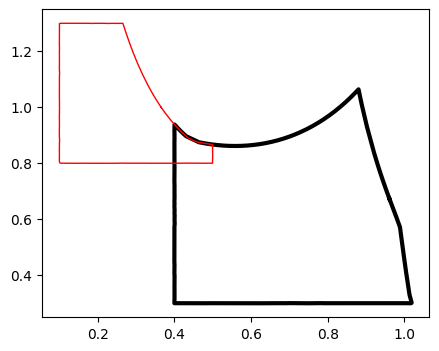

In [3]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
ax.plot(s0[0],s0[1],color="k",linewidth=3)
ax.plot(s1[0],s1[1],color="r",linewidth=1)
plt.show()

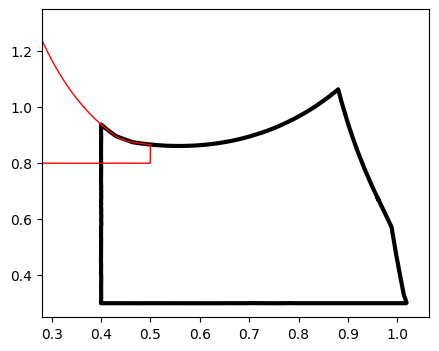

In [4]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
ax.plot(s0[0],s0[1],color="k",linewidth=3)
ax.plot(s1[0],s1[1],color="r",linewidth=1)
ax.set_xlim(0.28,None) #we only need to show this region
plt.show()

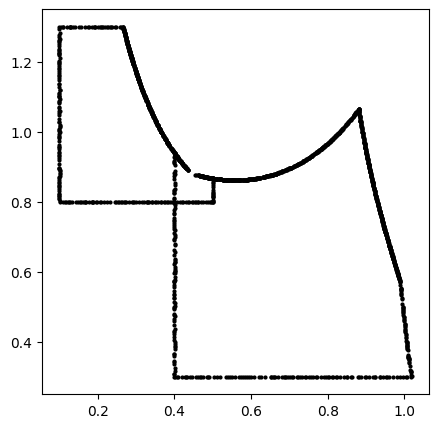

In [5]:
allpoints=[]
for s in [s0,s1]:
    for i in range(len(s[0])):
        if True: #s[0][i]<10 and s[1][i]<5:
            allpoints.append((s[0][i],s[1][i]))
xall=np.array([allpoints[i][0] for i in range(len(allpoints))])
yall=np.array([allpoints[i][1] for i in range(len(allpoints))])

fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.scatter(xall,yall,s=4,color="k")
#ax.plot(s1[0],s1[1],color="b")
plt.show()

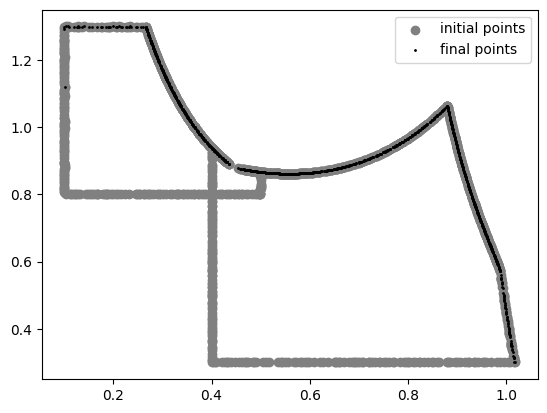

In [6]:
points=np.vstack((xall,yall)).transpose()
plt.scatter(xall,yall,color="gray",label="initial points")
mask=np.ones(len(points),dtype=bool)

tol=1e-4

#remove vertical lines
x=xall
y=yall
for idx in range(len(x)):
    xp=x[idx]
    yp=y[idx]
    if xp<max(y):
        samep=np.where(np.abs(x-xp)<tol)[0]
        stp=y[samep]
        argsort=np.argsort(stp)
        idxs_remove=np.arange(len(x))[samep[argsort[:-1]]]
        mask[idxs_remove]=False
points=points[mask]
#now remove horizontal ones with steepness < 0.82
mask=np.ones(len(points),dtype=bool)
x=points[:,0]
y=points[:,1]
for idx in range(len(x)):
    xp,yp=points[idx]
    stp=yp
    if yp<0.82:
        samestp=np.where(np.abs(y-yp)<tol)[0]
        pos=x[samestp]
        argsort=np.argsort(pos)
        idxs_remove=np.arange(len(x))[samestp[argsort[:-1]]]
        mask[idxs_remove]=False
points=points[mask]

#finally remove point near the lower-right corner
mask=np.ones(len(points),dtype=bool)
x=points[:,0]
y=points[:,1]
min_s=np.min(y)
max_p=np.max(x)
#remove the point that has similar steepness but less position
for idx in range(len(x)):
    xp,yp=points[idx]
    if max_p-xp>0 and max_p-xp<0.1 and yp-min_s>0 and yp-min_s<0.01:
        idxs_remove=[idx]
        mask[idxs_remove]=False
    
points=points[mask]
    

plt.scatter(points[:,0],points[:,1],s=1,label="final points",color="k")
plt.legend()
plt.show()


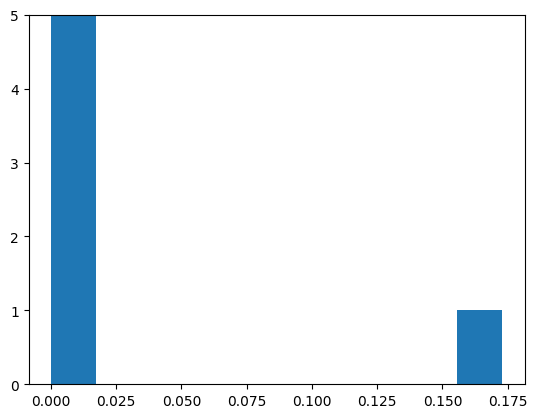

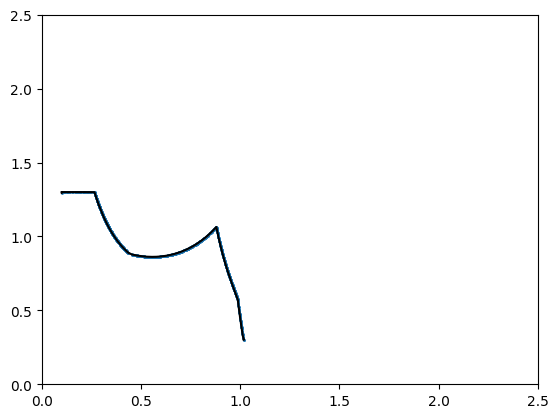

In [7]:
min_distances=[]
for idx in range(len(points)):
    xp,yp=points[idx]
    stp=yp
    
    mask_other=np.ones(len(points),dtype=bool)
    mask_other[idx]=False
    dist_x=points[mask_other][:,0]-xp
    dist_y=points[mask_other][:,1]-yp
    distances=np.sqrt(dist_x**2+dist_y**2)
    min_distances.append(min(distances))
plt.hist(min_distances)
plt.ylim(0,5)
plt.show()

#remove the few that are left floating around based on distance
#doublecheck that it matches what we had obtained originally
min_distances=np.array(min_distances)      
mask=np.ones(len(points),dtype=bool)
mask[min_distances>0.1]=False
points=points[mask]

argsort=np.argsort(points[:,0])
plt.scatter(points[:,0],points[:,1],s=1)
plt.plot(points[:,0][argsort],points[:,1][argsort],color="k")
plt.xlim(0,2.5)
plt.ylim(0,2.5)
plt.show()

Note that we get exactly the same as we had before. I could just add the corners to the black line so that I can plot it as x,y.

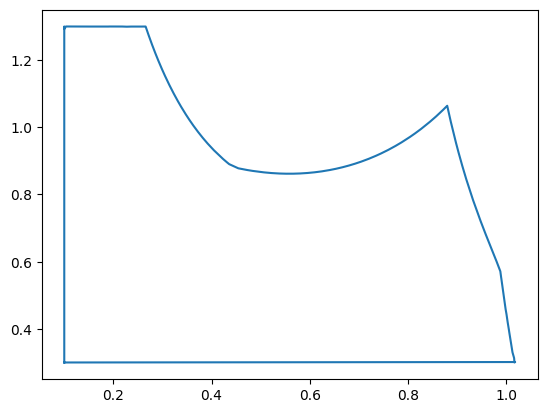

In [8]:

x=points[:,0]
sort_p=np.argsort(x)
y=points[:,1]
max_s=max(y)
all_x=[ll_corner[0],ll_corner[0]]+list(x[sort_p])+[ll_corner[0]]
all_y=[ll_corner[1],max_s]+list(y[sort_p])+[ll_corner[1]]
plt.plot(all_x,all_y)
plt.show()

In [9]:
np.save("../boundaryanalysis_notebooks/ashapes/N4Pb1000_7_centreandul_stitched_2023_8_21.npy",np.vstack((all_x,all_y)))

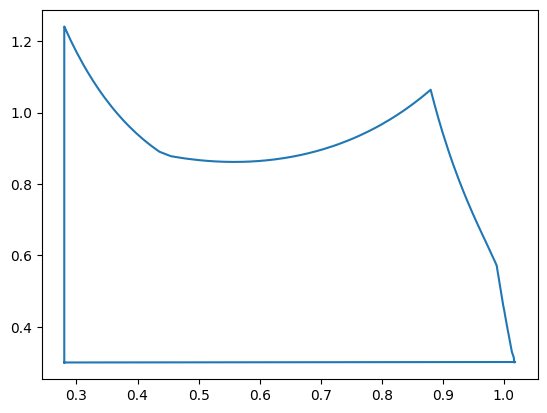

In [12]:
#Now make a boundary that is cut to the left at x=0.28

x=points[:,0]
sort_p=np.argsort(x)
y=points[:,1]
mask=np.where(x[sort_p]>0.28)
all_x=[0.28,0.28]+list(x[sort_p][mask])+[0.28]
max_s=max(y[sort_p][mask])
all_y=[ll_corner[1],max_s]+list(y[sort_p][mask])+[ll_corner[1]]
plt.plot(all_x,all_y)
plt.show()

In [11]:
np.save("../boundaryanalysis_notebooks/ashapes/N4Pb1000_7_centreandul_stitched_cutp=0.28_2023_8_21.npy",np.vstack((all_x,all_y)))